In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [140]:
def readImage2Gray(im_path):
    '''
    receive the image path and return the image in gray scale 
    /'''
    im = cv2.imread(im_path)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im_gray

In [141]:
def detecFaces(im_path, scaleFactor, minNeighbors):
    '''
    receives a image, convert to gray scale and detect faces
    using Haar Cascade classifier
    return an array with the detected faces (x, y, w, h)
    '''
    
    classifier = cv2.CascadeClassifier('../resources/classifiers/haarcascade_frontalface_default.xml')
    
    im_gray = readImage2Gray(im_path)
    faces = classifier.detectMultiScale(im_gray, scaleFactor, minNeighbors)
    
    return faces

In [142]:
def drawRect(im_path, faces):
    '''
    receive the image path and the detected faces
    return the image with yellow rectangles on the detected faces 
    '''
    image_withFaces = cv2.imread(im_path)
    image_withFaces = cv2.cvtColor(image_withFaces, cv2.COLOR_BGR2RGB)
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(image_withFaces, (x,y), (x+w, y+h), (255, 255, 0), 4)
    else:
        print('No face detected!!!')
    
    return plt.imshow(image_withFaces)
                  

In [143]:
faces_monks = detecFaces('monks.png', 1.07, 5)

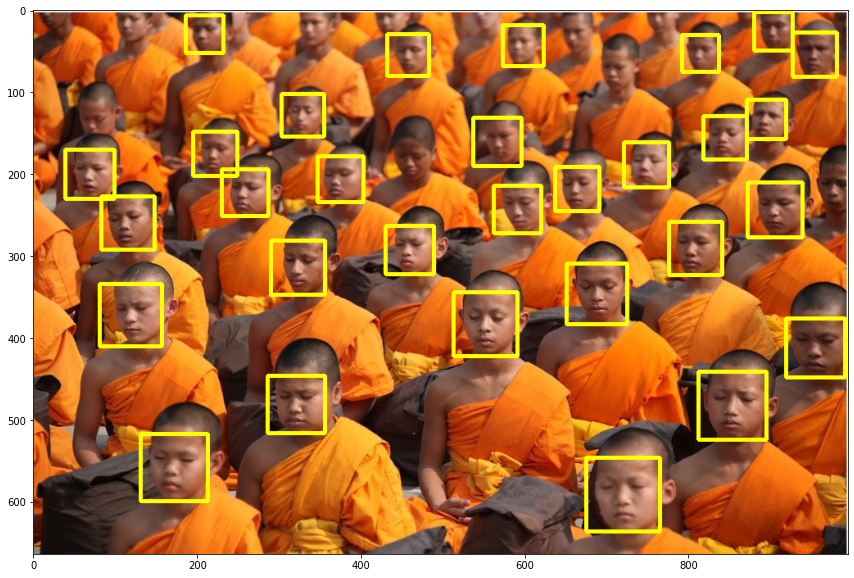

In [144]:
plt.figure(figsize=(15,10))
drawRect('monks.png', faces_monks)

In [145]:
faces_soldiers = detecFaces('ChinaMilitary.jpg', 1.05, 5)

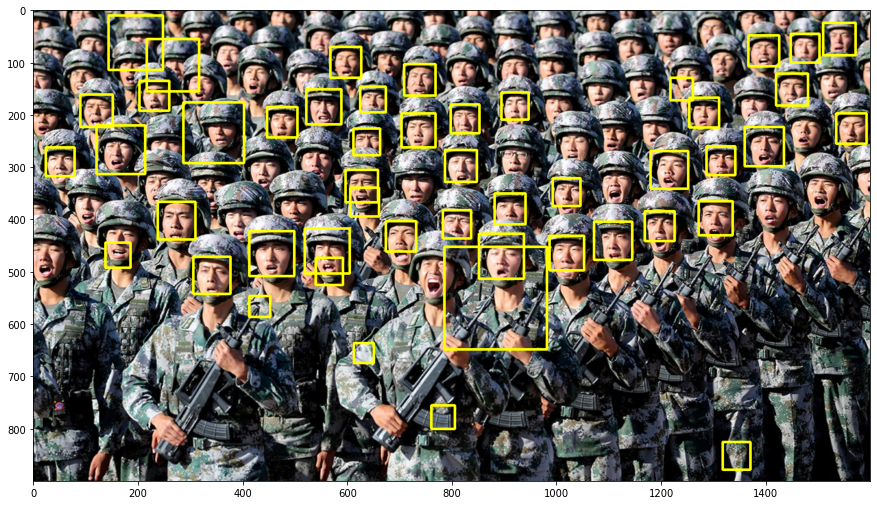

In [146]:
plt.figure(figsize=(15,10))
drawRect('ChinaMilitary.jpg', faces_soldiers)

In [147]:
faces_soldiers2 = detecFaces('ChinaMilitary2.jpg', 1.5, 3)

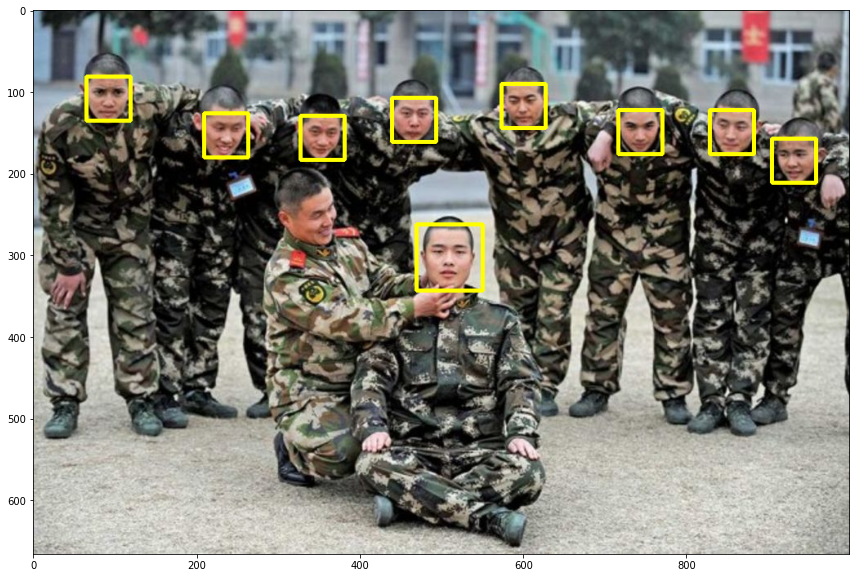

In [148]:
plt.figure(figsize=(15,10))
drawRect('ChinaMilitary2.jpg', faces_soldiers2)